In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#display for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)
#style of plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [170]:
#loading data
df=pd.read_csv('comauto_pos.csv')

In [171]:
#first few rows
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   GRCODE                   GRNAME  AccidentYear  DevelopmentYear  DevelopmentLag  IncurLoss_C  CumPaidLoss_C  BulkLoss_C  EarnedPremDIR_C  EarnedPremCeded_C  EarnedPremNet_C  Single  PostedReserve97_C
0     266  Public Underwriters Grp          1988             1988               1            0              0           0                0                  0                0       0                932
1     266  Public Underwriters Grp          1988             1989               2            0              0           0                0                  0                0       0                932
2     266  Public Underwriters Grp          1988             1990               3            0              0           0                0                  0                0       0                932
3     266  Public Underwriters Grp          1988             1991               4            0              0           0                0                  0             

In [172]:
#column names
print("\nColumns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag', 'IncurLoss_C', 'CumPaidLoss_C', 'BulkLoss_C', 'EarnedPremDIR_C', 'EarnedPremCeded_C', 'EarnedPremNet_C', 'Single', 'PostedReserve97_C']


In [173]:
#basic info of data
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15800 entries, 0 to 15799
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRCODE             15800 non-null  int64 
 1   GRNAME             15800 non-null  object
 2   AccidentYear       15800 non-null  int64 
 3   DevelopmentYear    15800 non-null  int64 
 4   DevelopmentLag     15800 non-null  int64 
 5   IncurLoss_C        15800 non-null  int64 
 6   CumPaidLoss_C      15800 non-null  int64 
 7   BulkLoss_C         15800 non-null  int64 
 8   EarnedPremDIR_C    15800 non-null  int64 
 9   EarnedPremCeded_C  15800 non-null  int64 
 10  EarnedPremNet_C    15800 non-null  int64 
 11  Single             15800 non-null  int64 
 12  PostedReserve97_C  15800 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.6+ MB
None


In [174]:
#Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         GRCODE  AccidentYear  DevelopmentYear  DevelopmentLag  IncurLoss_C  CumPaidLoss_C  BulkLoss_C  EarnedPremDIR_C  EarnedPremCeded_C  EarnedPremNet_C    Single  PostedReserve97_C
count  15800.00      15800.00         15800.00        15800.00     15800.00       15800.00    15800.00         15800.00           15800.00         15800.00  15800.00           15800.00
mean   18654.71       1992.50          1997.00            5.50      5155.74        4190.97      357.36          8985.44            1508.89          7476.56      0.72           10815.11
std    13227.70          2.87             4.06            2.87     20372.41       17662.75     2946.31         33696.35            5405.61         31555.93      0.45           36441.24
min      266.00       1988.00          1988.00            1.00      -253.00        -253.00    -1395.00          -445.00           -3329.00          -128.00      0.00               0.00
25%     8281.00       1990.00          1994.00        

In [175]:
#checking for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_C          0
CumPaidLoss_C        0
BulkLoss_C           0
EarnedPremDIR_C      0
EarnedPremCeded_C    0
EarnedPremNet_C      0
Single               0
PostedReserve97_C    0
dtype: int64


In [176]:
#what companies in the data
print("\nNumber of companies:", df['GRCODE'].nunique())


Number of companies: 158


In [177]:
#what accident years in the dataset
print("\nAccident years:", sorted(df['AccidentYear'].unique()))


Accident years: [1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997]


In [178]:
#Selecting one company
company_id=df['GRCODE'].unique()[0]
print(f"Analyzing company: {company_id}")


Analyzing company: 266


In [179]:
#filtering data for this company
company_df = df[df['GRCODE']== company_id].copy()

In [180]:
#focusing only on paid losses
#keeping only the columns we need
triangle_data = company_df[['AccidentYear', 'DevelopmentLag', 'CumPaidLoss_C']].copy()

In [181]:
#removing missing values
triangle_data = triangle_data.dropna()

In [182]:
#sorting by accident year and development lag
triangle_data= triangle_data.sort_values(['AccidentYear','DevelopmentLag'])
print("nFiltered data:")
print(triangle_data.head(20))

nFiltered data:
    AccidentYear  DevelopmentLag  CumPaidLoss_C
0           1988               1              0
1           1988               2              0
2           1988               3              0
3           1988               4              0
4           1988               5              0
5           1988               6              0
6           1988               7              0
7           1988               8              0
8           1988               9              0
9           1988              10              0
10          1989               1              6
11          1989               2             20
12          1989               3             21
13          1989               4             23
14          1989               5             24
15          1989               6             24
16          1989               7             24
17          1989               8             24
18          1989               9             24
19          1989        

In [183]:
#creating triangle using pivot (full square before masking)
triangle_full = triangle_data.pivot(
    index='AccidentYear',
    columns='DevelopmentLag',
    values='CumPaidLoss_C'
)

try:
    triangle_full.columns = triangle_full.columns.astype(int)
except ValueError as e:
    # This block would catch the error if a non-numeric column like 'AccidentYear'
    # snuck in, but usually, just the .astype(int) is enough.
    print(f"Error converting columns to int: {e}")

In [184]:
# remove accident years with no paid activity
triangle_full = triangle_full.loc[triangle_full.sum(axis=1) > 0].copy()

print("\nLoss Triangle (Cumulative Paid Losses) after removing zero rows:")
print(triangle_full)

# this is the triangle used everywhere
triangle = triangle_full.copy()
triangle.index = triangle.index.astype(int)


Loss Triangle (Cumulative Paid Losses) after removing zero rows:
DevelopmentLag   1     2     3     4     5     6     7     8     9     10
AccidentYear                                                             
1989              6    20    21    23    24    24    24    24    24    24
1990             52    95   105   117   128   128   128   128   128   128
1991            127   258   301   332   372   376   377   377   377   376
1992            120   225   277   339   361   370   372   379   386   386
1993            427  1005  1111  1263  1306  1346  1361  1376  1416  1416
1994            584  1511  1716  1817  1909  1933  1958  1958  1958  1958
1995            369   741   931   941  1096  1122  1099  1103  1103  1103
1996            294   595   657   704   720   722   721   721   721   721
1997            312   517   599   632   694   708   714   714   714   714


In [185]:
#saving this to csv for ref
triangle_full.to_csv('loss_triangle_full.csv')

In [186]:
#masking lower triangle (creating upper triangle)
print("\n" + "="*80)
print("MASKING LOWER TRIANGLE TO CREATE REALISTIC VALUATION SCENARIO")
print("="*80)
               #triangle is being defined here

# Valuation date (we're analyzing as of end of 1997)
valuation_year = triangle.index.max() 

# Mask the lower triangle
for accident_year in triangle.index:
    years_elapsed = valuation_year - accident_year
    max_observable_dev = years_elapsed + 1
    
    for dev_period in triangle.columns:
        if dev_period > max_observable_dev:
            triangle.loc[accident_year, dev_period] = np.nan

print("\nUpper Triangle (what we'd actually observe at valuation date):")
print(triangle)
# Verify masking
total_nans = triangle.isna().sum().sum()
print(f"\nTotal NaN cells: {total_nans} (should be 45)")

print("\nNaN count by accident year:")
for year in triangle.index:
    nan_count = triangle.loc[year].isna().sum()
    observable = valuation_year - year + 1
    print(f"  {year}: {nan_count} NaNs ({observable} observable periods)")
# Save upper triangle
triangle.to_csv('loss_triangle_upper.csv')


MASKING LOWER TRIANGLE TO CREATE REALISTIC VALUATION SCENARIO

Upper Triangle (what we'd actually observe at valuation date):
DevelopmentLag   1       2       3       4       5      6      7      8     9   10
AccidentYear                                                                      
1989              6    20.0    21.0    23.0    24.0   24.0   24.0   24.0  24.0 NaN
1990             52    95.0   105.0   117.0   128.0  128.0  128.0  128.0   NaN NaN
1991            127   258.0   301.0   332.0   372.0  376.0  377.0    NaN   NaN NaN
1992            120   225.0   277.0   339.0   361.0  370.0    NaN    NaN   NaN NaN
1993            427  1005.0  1111.0  1263.0  1306.0    NaN    NaN    NaN   NaN NaN
1994            584  1511.0  1716.0  1817.0     NaN    NaN    NaN    NaN   NaN NaN
1995            369   741.0   931.0     NaN     NaN    NaN    NaN    NaN   NaN NaN
1996            294   595.0     NaN     NaN     NaN    NaN    NaN    NaN   NaN NaN
1997            312     NaN     NaN     NaN

In [187]:
# Verify masking
total_nans = triangle.isna().sum().sum()
print(f"\nTotal NaN cells: {total_nans} (should be 45)")

print("\nNaN count by accident year:")
for year in triangle.index:
    nan_count = triangle.loc[year].isna().sum()
    observable = valuation_year - year + 1
    print(f"  {year}: {nan_count} NaNs ({observable} observable periods)")


Total NaN cells: 45 (should be 45)

NaN count by accident year:
  1989: 1 NaNs (9 observable periods)
  1990: 2 NaNs (8 observable periods)
  1991: 3 NaNs (7 observable periods)
  1992: 4 NaNs (6 observable periods)
  1993: 5 NaNs (5 observable periods)
  1994: 6 NaNs (4 observable periods)
  1995: 7 NaNs (3 observable periods)
  1996: 8 NaNs (2 observable periods)
  1997: 9 NaNs (1 observable periods)


In [188]:
# Save upper triangle
triangle.to_csv('loss_triangle_upper.csv')

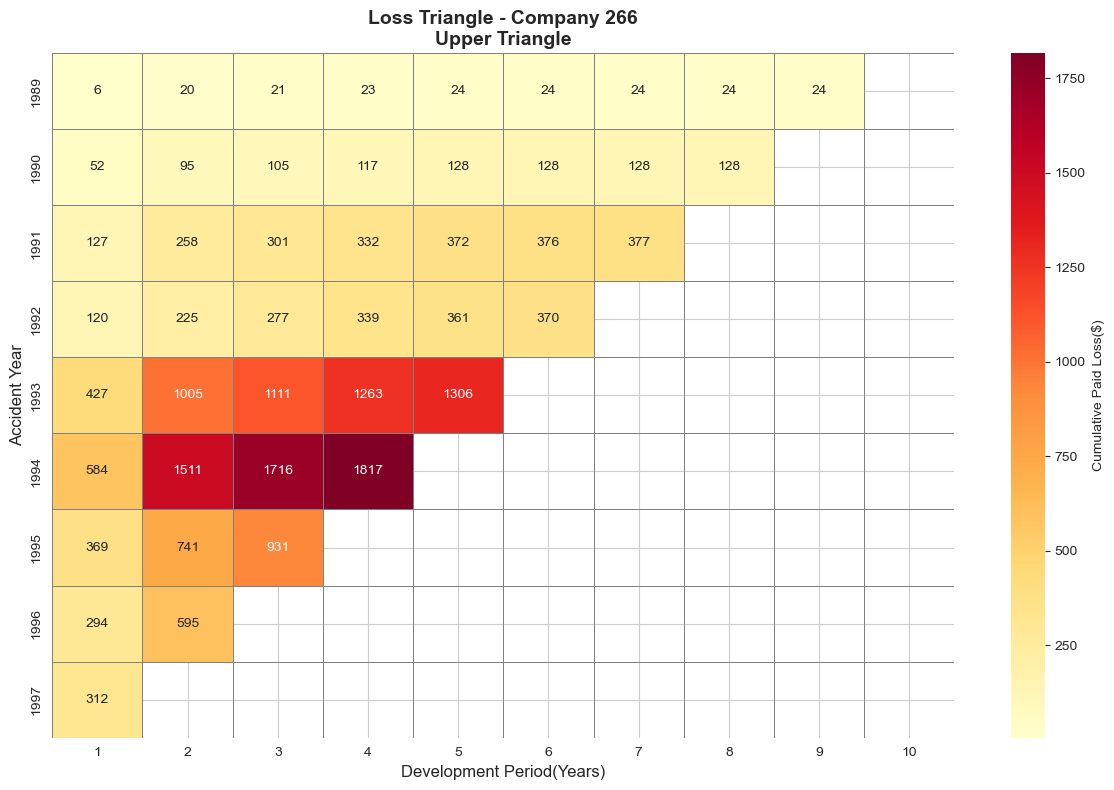


Triangle heatmap saved!


In [189]:
#Visualising the triangle as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(triangle,annot=True, fmt='.0f',cmap='YlOrRd', cbar_kws={'label':'Cumulative Paid Loss($)'}, linewidths=0.5, linecolor='gray')
plt.title(f'Loss Triangle - Company {company_id}\nUpper Triangle', fontsize=14, fontweight='bold')
plt.xlabel('Development Period(Years)', fontsize=12)
plt.ylabel('Accident Year', fontsize=12)
plt.tight_layout()
plt.savefig('loss_triangle_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nTriangle heatmap saved!")

In [190]:
#development factor calculation 
#development factor (LDF) = How much losses grow from one period to the next
#formula = LDF from period k to k+1 = (losses at k+1)/(losses at k)

print("\n" + "="*80)
print("CALCULATING DEVELOPMENT FACTORS")
print("="*80)

#calculating age to age factors (development factors)
def calculate_development_factors(triangle):
    """
    Calculate link ratios (development factors) for each development period.
    Link ratio from period k to k+1 = Triangle [:,k+1]/ Triangle[:,k]
    """
    ldfs= pd.DataFrame(index=triangle.index)

    #For each pair of consecutive development periods
    for i in range(len(triangle.columns) - 1):
        col_current = triangle.columns[i]
        col_next = triangle.columns[i+1]

        #Calculating ratio for this development period
        denom = triangle[col_current].replace(0,np.nan)
        ratio = triangle[col_next]/denom

        #Storing in dataframe
        ldfs[f'{col_current}-to-{col_next}'] = ratio
    
    return ldfs

#calculating the factors
age_to_age_factors = calculate_development_factors(triangle)

print("\nAge-to-Age Factors (Development Factors):")
print(age_to_age_factors)



CALCULATING DEVELOPMENT FACTORS

Age-to-Age Factors (Development Factors):
              1-to-2  2-to-3  3-to-4  4-to-5  5-to-6  6-to-7  7-to-8  8-to-9  9-to-10
AccidentYear                                                                         
1989            3.33    1.05    1.10    1.04    1.00     1.0     1.0     1.0      NaN
1990            1.83    1.11    1.11    1.09    1.00     1.0     1.0     NaN      NaN
1991            2.03    1.17    1.10    1.12    1.01     1.0     NaN     NaN      NaN
1992            1.88    1.23    1.22    1.06    1.02     NaN     NaN     NaN      NaN
1993            2.35    1.11    1.14    1.03     NaN     NaN     NaN     NaN      NaN
1994            2.59    1.14    1.06     NaN     NaN     NaN     NaN     NaN      NaN
1995            2.01    1.26     NaN     NaN     NaN     NaN     NaN     NaN      NaN
1996            2.02     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN
1997             NaN     NaN     NaN     NaN     NaN     NaN    

In [191]:
#calculating summary statistics for each development period
print("\nSummary of Development Factors:")
summary_ldfs = age_to_age_factors.describe()
print(summary_ldfs)


Summary of Development Factors:
       1-to-2  2-to-3  3-to-4  4-to-5  5-to-6    6-to-7  7-to-8  8-to-9  9-to-10
count    8.00    7.00    6.00    5.00    4.00  3.00e+00     2.0     1.0      0.0
mean     2.25    1.15    1.12    1.07    1.01  1.00e+00     1.0     1.0      NaN
std      0.50    0.07    0.06    0.04    0.01  1.54e-03     0.0     NaN      NaN
min      1.83    1.05    1.06    1.03    1.00  1.00e+00     1.0     1.0      NaN
25%      1.97    1.11    1.10    1.04    1.00  1.00e+00     1.0     1.0      NaN
50%      2.03    1.14    1.11    1.06    1.01  1.00e+00     1.0     1.0      NaN
75%      2.41    1.20    1.13    1.09    1.01  1.00e+00     1.0     1.0      NaN
max      3.33    1.26    1.22    1.12    1.02  1.00e+00     1.0     1.0      NaN


In [192]:
#selecting factors to use
#using simple average for simplicity
selected_ldfs = age_to_age_factors.mean(skipna=True)

print("\nSelected Development Factors (Simple Average):")
print(selected_ldfs)


Selected Development Factors (Simple Average):
1-to-2     2.25
2-to-3     1.15
3-to-4     1.12
4-to-5     1.07
5-to-6     1.01
6-to-7     1.00
7-to-8     1.00
8-to-9     1.00
9-to-10     NaN
dtype: float64


In [193]:
#Adding a tail factor 
#typical assumption: 1.01 to 1.05
tail_factor = 1.02
print(f"\nTail Factor: {tail_factor}")


Tail Factor: 1.02


In [194]:
#calculating cumulative development factors (CDF)
# CDF = Product of all future LDFs
selected_ldfs_list = selected_ldfs.tolist()
selected_ldfs_list.append(tail_factor) #add tail

cdfs = []
for i in range(len(selected_ldfs_list)):
    # CDF at period i = product of all factors from i to end 
    cdf = np.nanprod(selected_ldfs_list[i:])
    cdfs.append(cdf)

In [195]:
#cdf with ultimate 
cdfs_with_ultimate = cdfs +[1.0]

#creating a summary dataframe
dev_summary = pd.DataFrame({
    'Development Period': list(triangle.columns) + ['Ultimate'],
    'Age to Age Factor': ['-'] + [f'{v:.4f}' for v in selected_ldfs_list],
    'Cumulative Dev Factor': cdfs_with_ultimate
})

print("\nDevelopment Factor Summary:")
print(dev_summary)


Development Factor Summary:
   Development Period Age to Age Factor  Cumulative Dev Factor
0                   1                 -                   3.21
1                   2            2.2550                   1.42
2                   3            1.1501                   1.24
3                   4            1.1220                   1.10
4                   5            1.0714                   1.03
5                   6            1.0089                   1.02
6                   7            1.0009                   1.02
7                   8            1.0000                   1.02
8                   9            1.0000                   1.02
9                  10               nan                   1.02
10           Ultimate            1.0200                   1.00


In [196]:
#savong dev summary
dev_summary.to_csv('development_factors.csv', index=False)

In [197]:
try:
    print("\nselected_ldfs_list (if exists):", selected_ldfs_list)
    print("len(selected_ldfs_list) =", len(selected_ldfs_list))
except NameError:
    print("selected_ldfs_list not defined in this session")

try:
    print("\ncdfs (if exists):", cdfs)
    print("len(cdfs) =", len(cdfs))
except NameError:
    print("cdfs not defined in this session")



selected_ldfs_list (if exists): [2.25495635275787, 1.1500850813525503, 1.1220020079622985, 1.0713839920333423, 1.00892085902362, 1.000886524822695, 1.0, 1.0, nan, 1.02]
len(selected_ldfs_list) = 10

cdfs (if exists): [3.211064374312441, 1.4240028949497074, 1.238171782278071, 1.1035379379817258, 1.030011598257465, 1.020904255319149, 1.02, 1.02, 1.02, 1.02]
len(cdfs) = 10


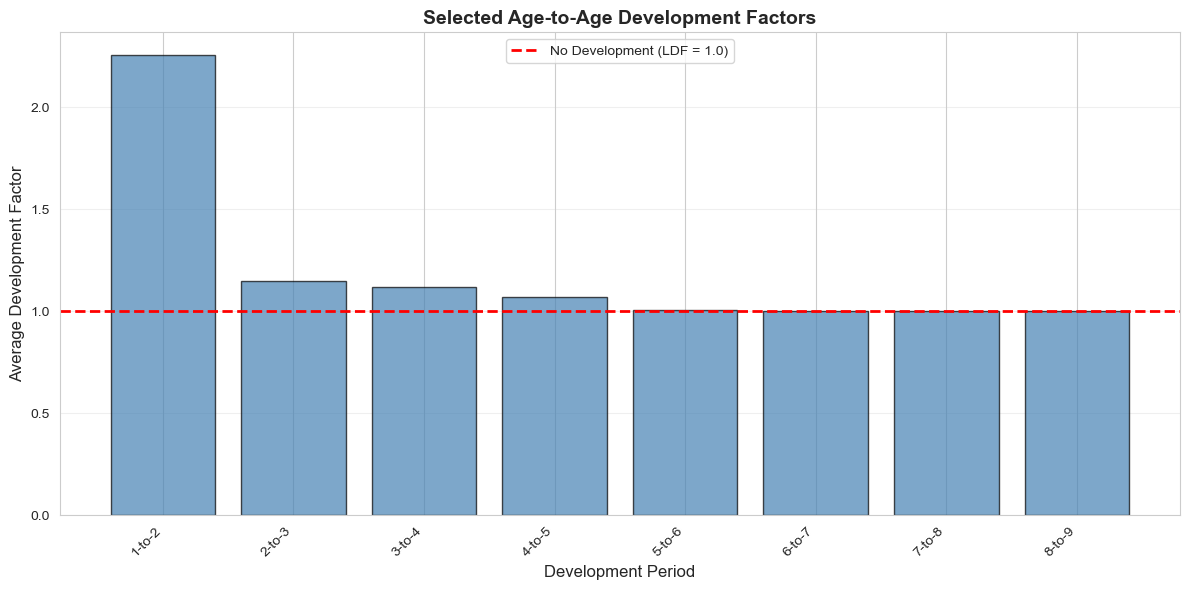


Development factors chart saved!


In [198]:
#Plotting Selected Development Factors
plt.figure(figsize=(12, 6))
periods = [f"{triangle.columns[i]}-to-{triangle.columns[i+1]}" 
           for i in range(len(triangle.columns)-1)]
plt.bar(periods, selected_ldfs.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='No Development (LDF = 1.0)')
plt.xlabel('Development Period', fontsize=12)
plt.ylabel('Average Development Factor', fontsize=12)
plt.title('Selected Age-to-Age Development Factors', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('development_factors.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDevelopment factors chart saved!")

In [199]:
#projecting ultimate loss
#most recent reported values for each accident
latest_values = triangle.apply(lambda row: row.dropna().iloc[-1], axis=1)

print("\nLatest Reported Values (Latest Diagonal):")
print(latest_values)


Latest Reported Values (Latest Diagonal):
AccidentYear
1989      24.0
1990     128.0
1991     377.0
1992     370.0
1993    1306.0
1994    1817.0
1995     931.0
1996     595.0
1997     312.0
dtype: float64


In [200]:
#determining development age for each accident (how many periods of data do we have for each year)
development_ages = triangle.notna().sum(axis=1)

print("\nDevelopment Ages:")
print(development_ages)


Development Ages:
AccidentYear
1989    9
1990    8
1991    7
1992    6
1993    5
1994    4
1995    3
1996    2
1997    1
dtype: int64


In [201]:
#projecting this to ultimate using CDF
ultimate_losses = []
for ay in triangle.index:
    latest_value = latest_values[ay]
    dev_age = int(development_ages[ay])

    #getting the appropriate CDF based on development age
    #CDF at the development age tells us how much more development expected
    cdf = cdfs[dev_age - 1] #-1 because list is 0 indexed

    # Ultimate = Latest Value * CDF
    ultimate = latest_value * cdf 
    ultimate_losses.append(ultimate)

In [202]:
#creating a results dataframe
results = pd.DataFrame({
    'Accident Year': triangle.index,
    'Latest Reported': latest_values.values,
    'Development Age': development_ages.values,
    'CDF': [cdfs[age - 1] for age in development_ages.values],
    'Ultimate Loss': ultimate_losses,
    'IBNR Reserve': [ult - latest for ult, latest in zip(ultimate_losses, latest_values.values)]
})

print("\nProjected Ultimate Losses:")
print(results)


Projected Ultimate Losses:
   Accident Year  Latest Reported  Development Age   CDF  Ultimate Loss  IBNR Reserve
0           1989             24.0                9  1.02          24.48          0.48
1           1990            128.0                8  1.02         130.56          2.56
2           1991            377.0                7  1.02         384.54          7.54
3           1992            370.0                6  1.02         377.73          7.73
4           1993           1306.0                5  1.03        1345.20         39.20
5           1994           1817.0                4  1.10        2005.13        188.13
6           1995            931.0                3  1.24        1152.74        221.74
7           1996            595.0                2  1.42         847.28        252.28
8           1997            312.0                1  3.21        1001.85        689.85


In [203]:
#calculating totals and ratios
total_latest = results['Latest Reported'].sum()
total_ultimate = results['Ultimate Loss'].sum()
total_ibnr = results['IBNR Reserve'].sum()
reserve_ratio = (total_ibnr / total_latest) * 100

print("\n" + "="*80)
print("SUMMARY RESULTS")
print("="*80)
print(f"Total Latest Reported:  ${total_latest:,.2f}")
print(f"Total Ultimate Losses:  ${total_ultimate:,.2f}")
print(f"Total IBNR Reserve:     ${total_ibnr:,.2f}")
print(f"Reserve-to-Paid Ratio:  {reserve_ratio:.2f}%")
print("="*80)


SUMMARY RESULTS
Total Latest Reported:  $5,860.00
Total Ultimate Losses:  $7,269.51
Total IBNR Reserve:     $1,409.51
Reserve-to-Paid Ratio:  24.05%


In [204]:
#saving results
results.to_csv('reserve_estimates.csv', index=False)

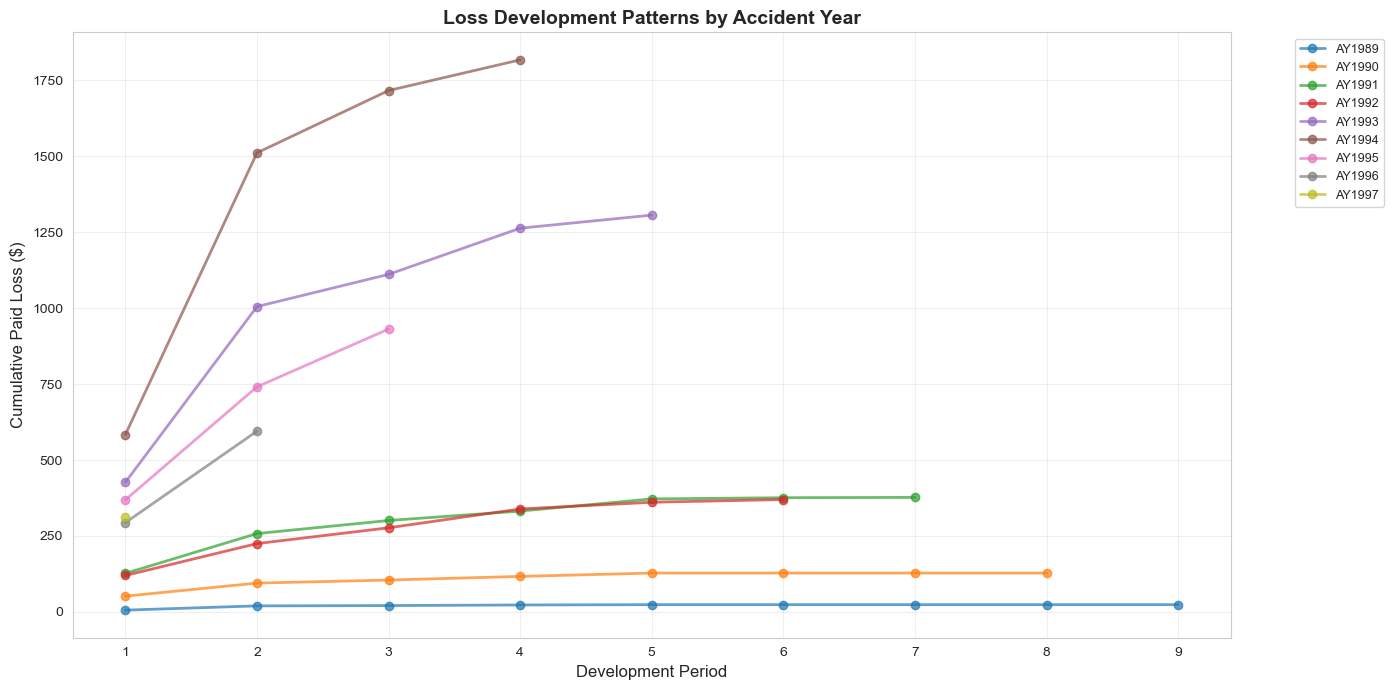

In [205]:
#1:Visualizing Development Patterns
plt.figure(figsize=(14,7))

#plotting cumulative losses for each accident year
for ay in triangle.index:
    data = triangle.loc[ay].dropna()
    plt.plot(data.index, data.values, marker='o',linewidth=2, markersize=6,label=f'AY{ay}', alpha=0.7)

plt.xlabel('Development Period', fontsize= 12)
plt.ylabel('Cumulative Paid Loss ($)', fontsize= 12)
plt.title('Loss Development Patterns by Accident Year', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('development_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

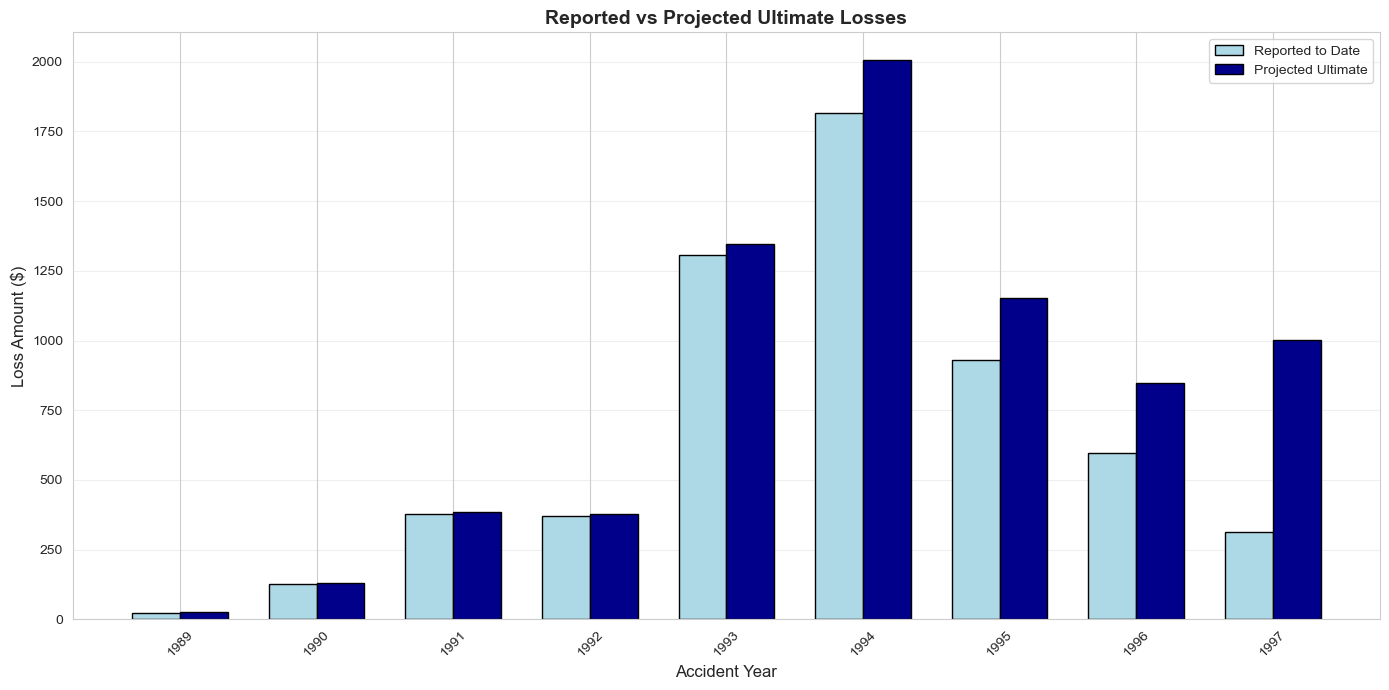

In [206]:
#2 Visualizing Ultimate Losses by Accident
#Reported vs Ultimate
plt.figure(figsize=(14,7))
x= range(len(results))
width=0.35

plt.bar([i - width/2 for i in x], results['Latest Reported'], width, label= 'Reported to Date', color= 'lightblue', edgecolor='black')
plt.bar([i + width/2 for i in x], results['Ultimate Loss'], width, label= 'Projected Ultimate', color='darkblue', edgecolor='black')

plt.xlabel('Accident Year', fontsize=12)
plt.ylabel('Loss Amount ($)', fontsize=12)
plt.title('Reported vs Projected Ultimate Losses', fontsize=14, fontweight='bold')
plt.xticks(x, results['Accident Year'].astype(str), rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('ultimate_losses_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

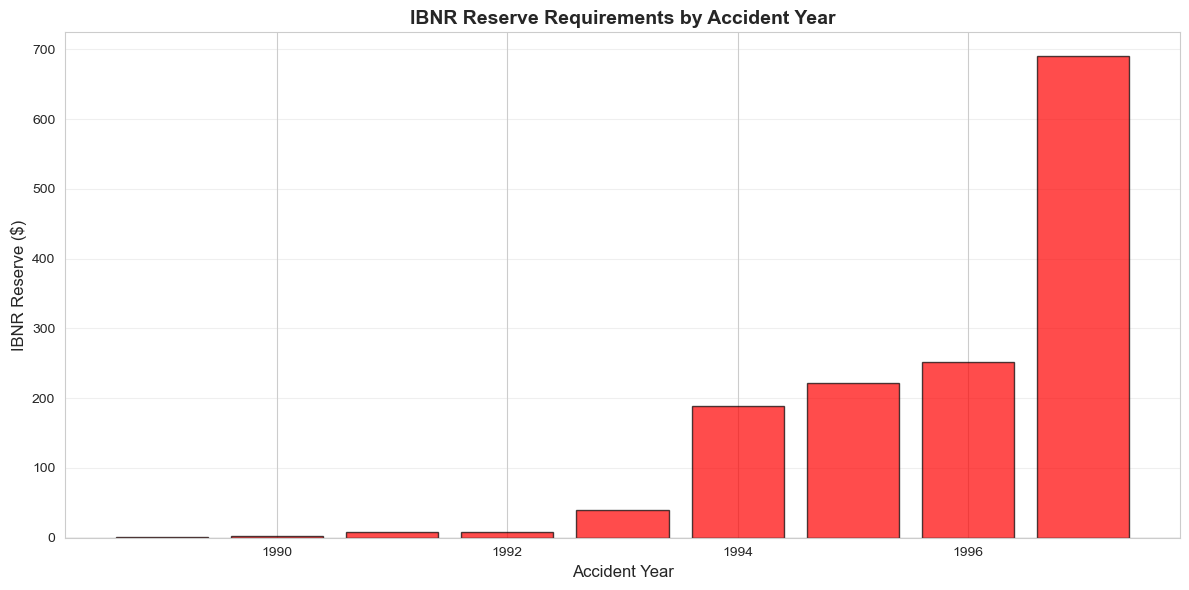

In [207]:
#3 Visualizing IBNR Reserve by Accident Year
plt.figure(figsize=(12,6))
colors=['red' if x>0 else 'green' for x in results['IBNR Reserve']]
plt.bar(results['Accident Year'], results['IBNR Reserve'], color=colors, 
        edgecolor='black', alpha=0.7)
plt.xlabel('Accident Year', fontsize=12)
plt.ylabel('IBNR Reserve ($)', fontsize=12)
plt.title('IBNR Reserve Requirements by Accident Year', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('ibnr_reserve.png', dpi=300, bbox_inches='tight')
plt.show()

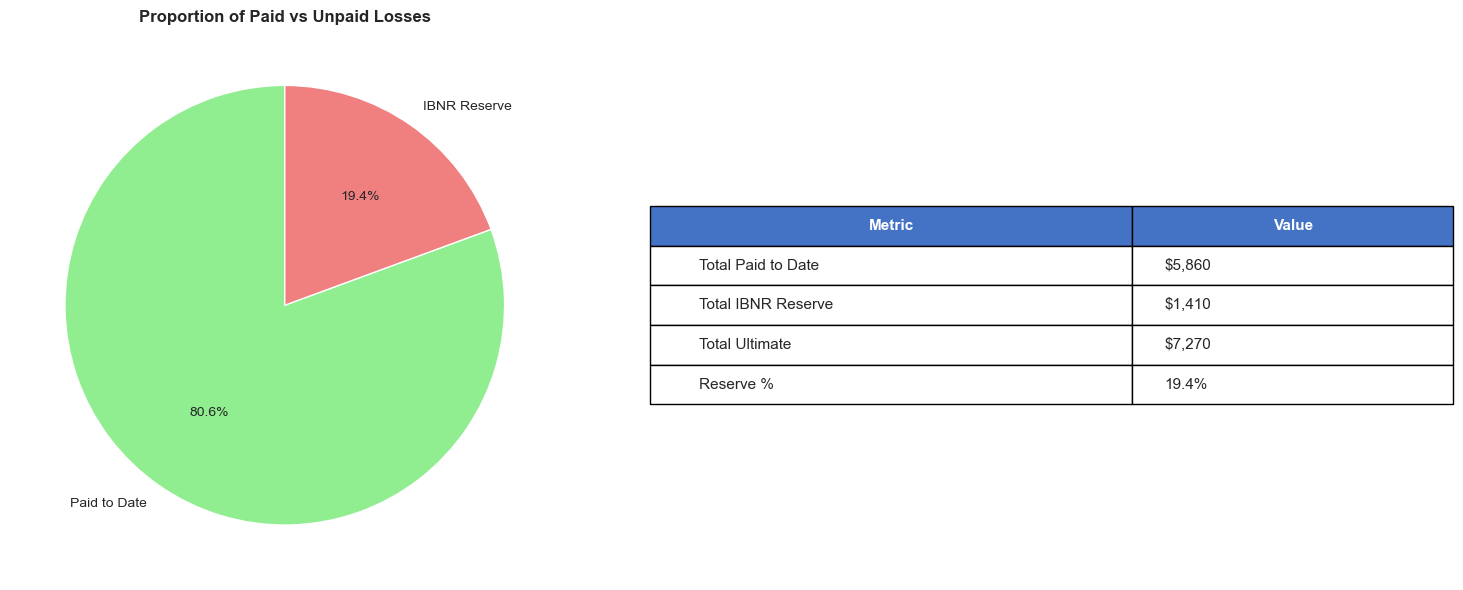


All visualizations saved!


In [216]:
#Visualization 5: Reserve Development Summary
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6))

#Pie Chart: Paid vs Reserve
paid_total = results['Latest Reported'].sum()
reserve_total = results['IBNR Reserve'].sum()
ax1.pie([paid_total, reserve_total],
        labels = ['Paid to Date', 'IBNR Reserve'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'],
        startangle=90)
ax1.set_title('Proportion of Paid vs Unpaid Losses', fontsize=12, fontweight='bold')

#Table Summary
table_data = [
    ['Total Paid to Date', f'${paid_total:,.0f}'],
    ['Total IBNR Reserve', f'${reserve_total:,.0f}'],
    ['Total Ultimate', f'${paid_total + reserve_total:,.0f}'],
    ['Reserve %', f'{100*reserve_total/(paid_total + reserve_total):.1f}%']
]
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=table_data, 
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Style header
for i in range(2):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.savefig('reserve_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAll visualizations saved!")

In [209]:
#calculating diagnostics and quality metrics

#1. Calculate residulas (how much do individual years deviate from average?)
residuals= age_to_age_factors.subtract(selected_ldfs, axis=1)

print("\nResiduals (Actual - Expected Development):")
print(residuals)


Residuals (Actual - Expected Development):
              1-to-2  2-to-3    3-to-4    4-to-5    5-to-6    6-to-7  7-to-8  8-to-9  9-to-10
AccidentYear                                                                                 
1989            1.08   -0.10 -2.68e-02 -2.79e-02 -8.92e-03 -8.87e-04     0.0     0.0      NaN
1990           -0.43   -0.04 -7.72e-03  2.26e-02 -8.92e-03 -8.87e-04     0.0     NaN      NaN
1991           -0.22    0.02 -1.90e-02  4.91e-02  1.83e-03  1.77e-03     NaN     NaN      NaN
1992           -0.38    0.08  1.02e-01 -6.49e-03  1.60e-02       NaN     NaN     NaN      NaN
1993            0.10   -0.04  1.48e-02 -3.73e-02       NaN       NaN     NaN     NaN      NaN
1994            0.33   -0.01 -6.31e-02       NaN       NaN       NaN     NaN     NaN      NaN
1995           -0.25    0.11       NaN       NaN       NaN       NaN     NaN     NaN      NaN
1996           -0.23     NaN       NaN       NaN       NaN       NaN     NaN     NaN      NaN
1997            

In [210]:
# 2. Standard deviation of development factors
print("\nStandard Deviation of Development Factors:")
print(age_to_age_factors.std())


Standard Deviation of Development Factors:
1-to-2     5.04e-01
2-to-3     7.34e-02
3-to-4     5.61e-02
4-to-5     3.58e-02
5-to-6     1.18e-02
6-to-7     1.54e-03
7-to-8     0.00e+00
8-to-9          NaN
9-to-10         NaN
dtype: float64


In [211]:
# 3. Coefficient of variation (CV = std / mean)
cv = age_to_age_factors.std() / age_to_age_factors.mean()
print("\nCoefficient of Variation (lower is more stable):")
print(cv)


Coefficient of Variation (lower is more stable):
1-to-2     2.23e-01
2-to-3     6.39e-02
3-to-4     5.00e-02
4-to-5     3.35e-02
5-to-6     1.17e-02
6-to-7     1.53e-03
7-to-8     0.00e+00
8-to-9          NaN
9-to-10         NaN
dtype: float64


In [212]:
# 4. Test for trends in development factors
print("\nTesting for trends in development factors:")
for col in age_to_age_factors.columns:
    data = age_to_age_factors[col].dropna()
    if len(data) > 2:
        # Simple linear trend: are factors increasing/decreasing over time?
        x = np.arange(len(data))
        y = data.values
        slope, intercept = np.polyfit(x, y, 1)
        
        trend_pct = (slope * len(data) / data.mean()) * 100
        print(f"  {col}: {'Increasing' if slope > 0 else 'Decreasing'} trend of {abs(trend_pct):.2f}%")


Testing for trends in development factors:
  1-to-2: Decreasing trend of 25.82%
  2-to-3: Increasing trend of 13.45%
  3-to-4: Increasing trend of 0.10%
  4-to-5: Decreasing trend of 2.24%
  5-to-6: Increasing trend of 3.39%
  6-to-7: Increasing trend of 0.40%


In [213]:
# 5. Calculate confidence intervals on reserves

reserve_std = results['IBNR Reserve'].std()
reserve_mean = results['IBNR Reserve'].mean()

# Rough confidence interval: mean ± 2*std (approximately 95% CI)
total_reserve_low = total_ibnr - 2 * reserve_std * np.sqrt(len(results))
total_reserve_high = total_ibnr + 2 * reserve_std * np.sqrt(len(results))

print(f"\nApproximate 95% Confidence Interval on Total Reserve:")
print(f"  Low:  ${total_reserve_low:,.0f}")
print(f"  Mean: ${total_ibnr:,.0f}")
print(f"  High: ${total_reserve_high:,.0f}")


Approximate 95% Confidence Interval on Total Reserve:
  Low:  $59
  Mean: $1,410
  High: $2,760


In [214]:
# 6. Calculate reserve-to-paid ratio
reserve_to_paid = total_ibnr / paid_total

print(f"\nReserve-to-Paid Ratio: {reserve_to_paid:.2%}")
print("(This means reserves are {:.0%} of what's been paid so far)".format(reserve_to_paid))


Reserve-to-Paid Ratio: 24.05%
(This means reserves are 24% of what's been paid so far)


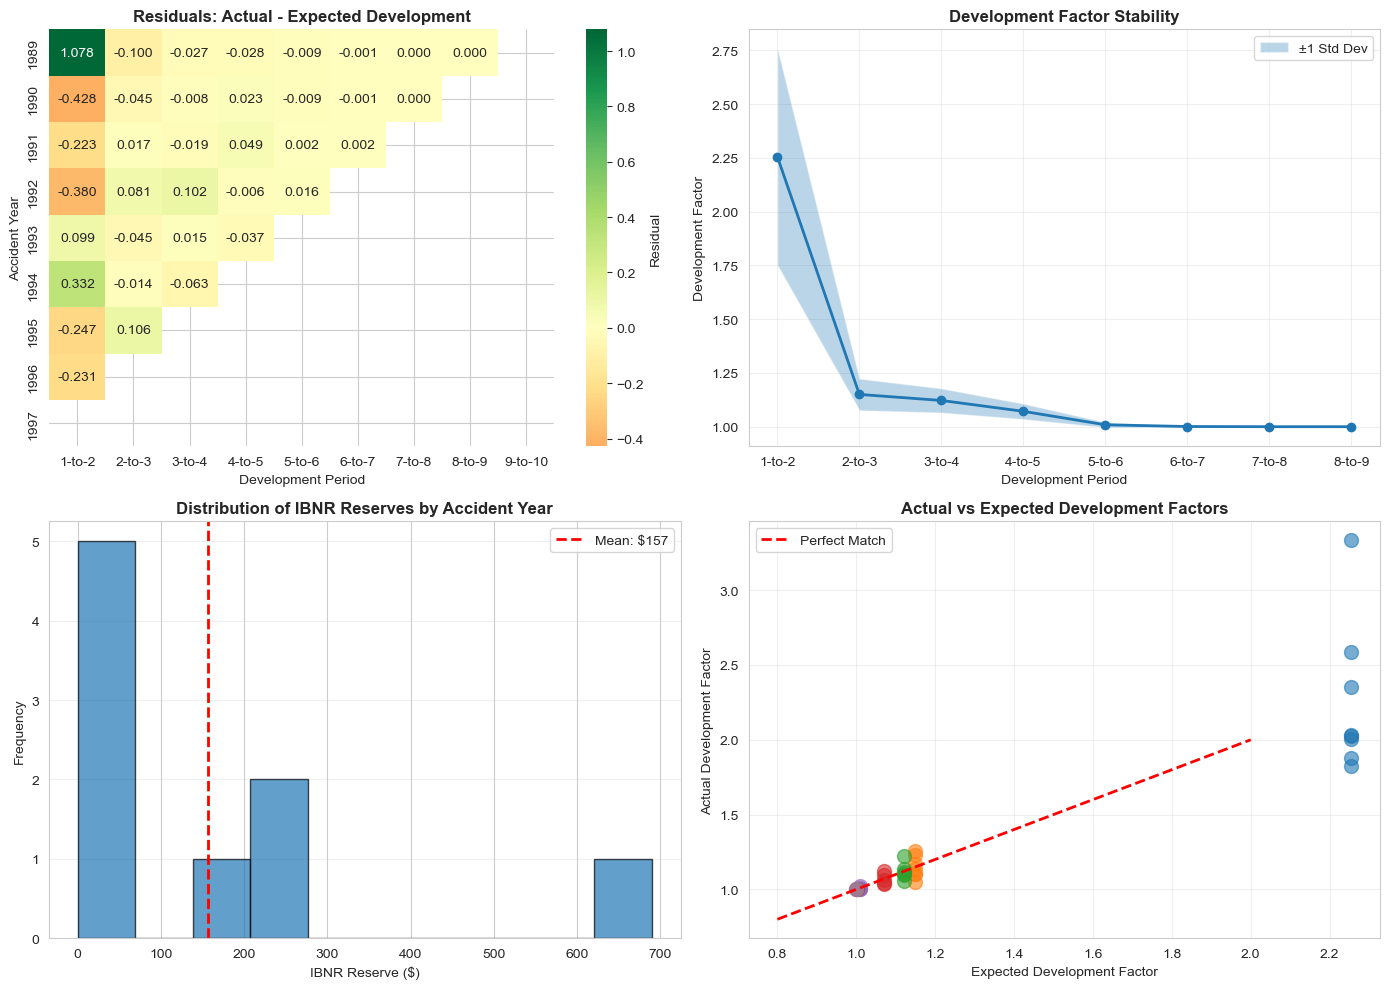

In [215]:
# Creating diagnostic plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Residuals heatmap
sns.heatmap(residuals, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
            ax=axes[0,0], cbar_kws={'label': 'Residual'})
axes[0,0].set_title('Residuals: Actual - Expected Development', fontweight='bold')
axes[0,0].set_xlabel('Development Period')
axes[0,0].set_ylabel('Accident Year')

# Plot 2: Development factor stability
axes[0,1].plot(selected_ldfs.index, selected_ldfs.values, marker='o', linewidth=2)
axes[0,1].fill_between(selected_ldfs.index, 
                        selected_ldfs.values - age_to_age_factors.std(),
                        selected_ldfs.values + age_to_age_factors.std(),
                        alpha=0.3, label='±1 Std Dev')
axes[0,1].set_xlabel('Development Period')
axes[0,1].set_ylabel('Development Factor')
axes[0,1].set_title('Development Factor Stability', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Plot 3: Reserve distribution
axes[1,0].hist(results['IBNR Reserve'], bins=10, edgecolor='black', alpha=0.7)
axes[1,0].axvline(results['IBNR Reserve'].mean(), color='red', 
                  linestyle='--', linewidth=2, label=f'Mean: ${results["IBNR Reserve"].mean():,.0f}')
axes[1,0].set_xlabel('IBNR Reserve ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of IBNR Reserves by Accident Year', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3, axis='y')

# Plot 4: Actual vs Expected development (scatter)
for col in age_to_age_factors.columns:
    data = age_to_age_factors[col].dropna()
    expected = selected_ldfs[col]
    axes[1,1].scatter([expected]*len(data), data.values, alpha=0.6, s=100)

axes[1,1].plot([0.8, 2.0], [0.8, 2.0], 'r--', linewidth=2, label='Perfect Match')
axes[1,1].set_xlabel('Expected Development Factor')
axes[1,1].set_ylabel('Actual Development Factor')
axes[1,1].set_title('Actual vs Expected Development Factors', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('diagnostic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()